In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [2]:
df =pd.read_csv('Algerian_forest_fires_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [6]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [7]:
A=df.iloc[:,-1] # Imputing Classes Column
A.replace(to_replace=['not fire','fire'], value=[0,1],inplace=True,regex=True)
A_1=pd.DataFrame(A)

A_1


,Classes
0,0
1,0
2,0
3,0
4,0
...,...
239,1
240,0
241,0
242,0


In [8]:
y=df.iloc[:,-1] # Selecting Target column which is Classes
y

0      0
1      0
2      0
3      0
4      0
      ..
239    1
240    0
241    0
242    0
243    0
Name: Classes  , Length: 244, dtype: int64

In [9]:
X_1=df[['day', 'month',' RH', ' Ws', 'Rain ', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]
X=pd.concat([X_1], axis=1) # axis=1 implies horizontal concatenation
df_final=X
df_final

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27,9,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28,9,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29,9,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [10]:
df_final.corr()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234
month,2.232788e-17,1.000000e+00,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732
RH,-7.420934e-02,-3.788419e-02,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,4.700086e-02,-4.144673e-02,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-1.122654e-01,3.532207e-02,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,2.240321e-01,1.557668e-02,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,4.915710e-01,6.817778e-02,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,5.279285e-01,1.276719e-01,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,1.793008e-01,6.354476e-02,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,5.172239e-01,8.556743e-02,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912


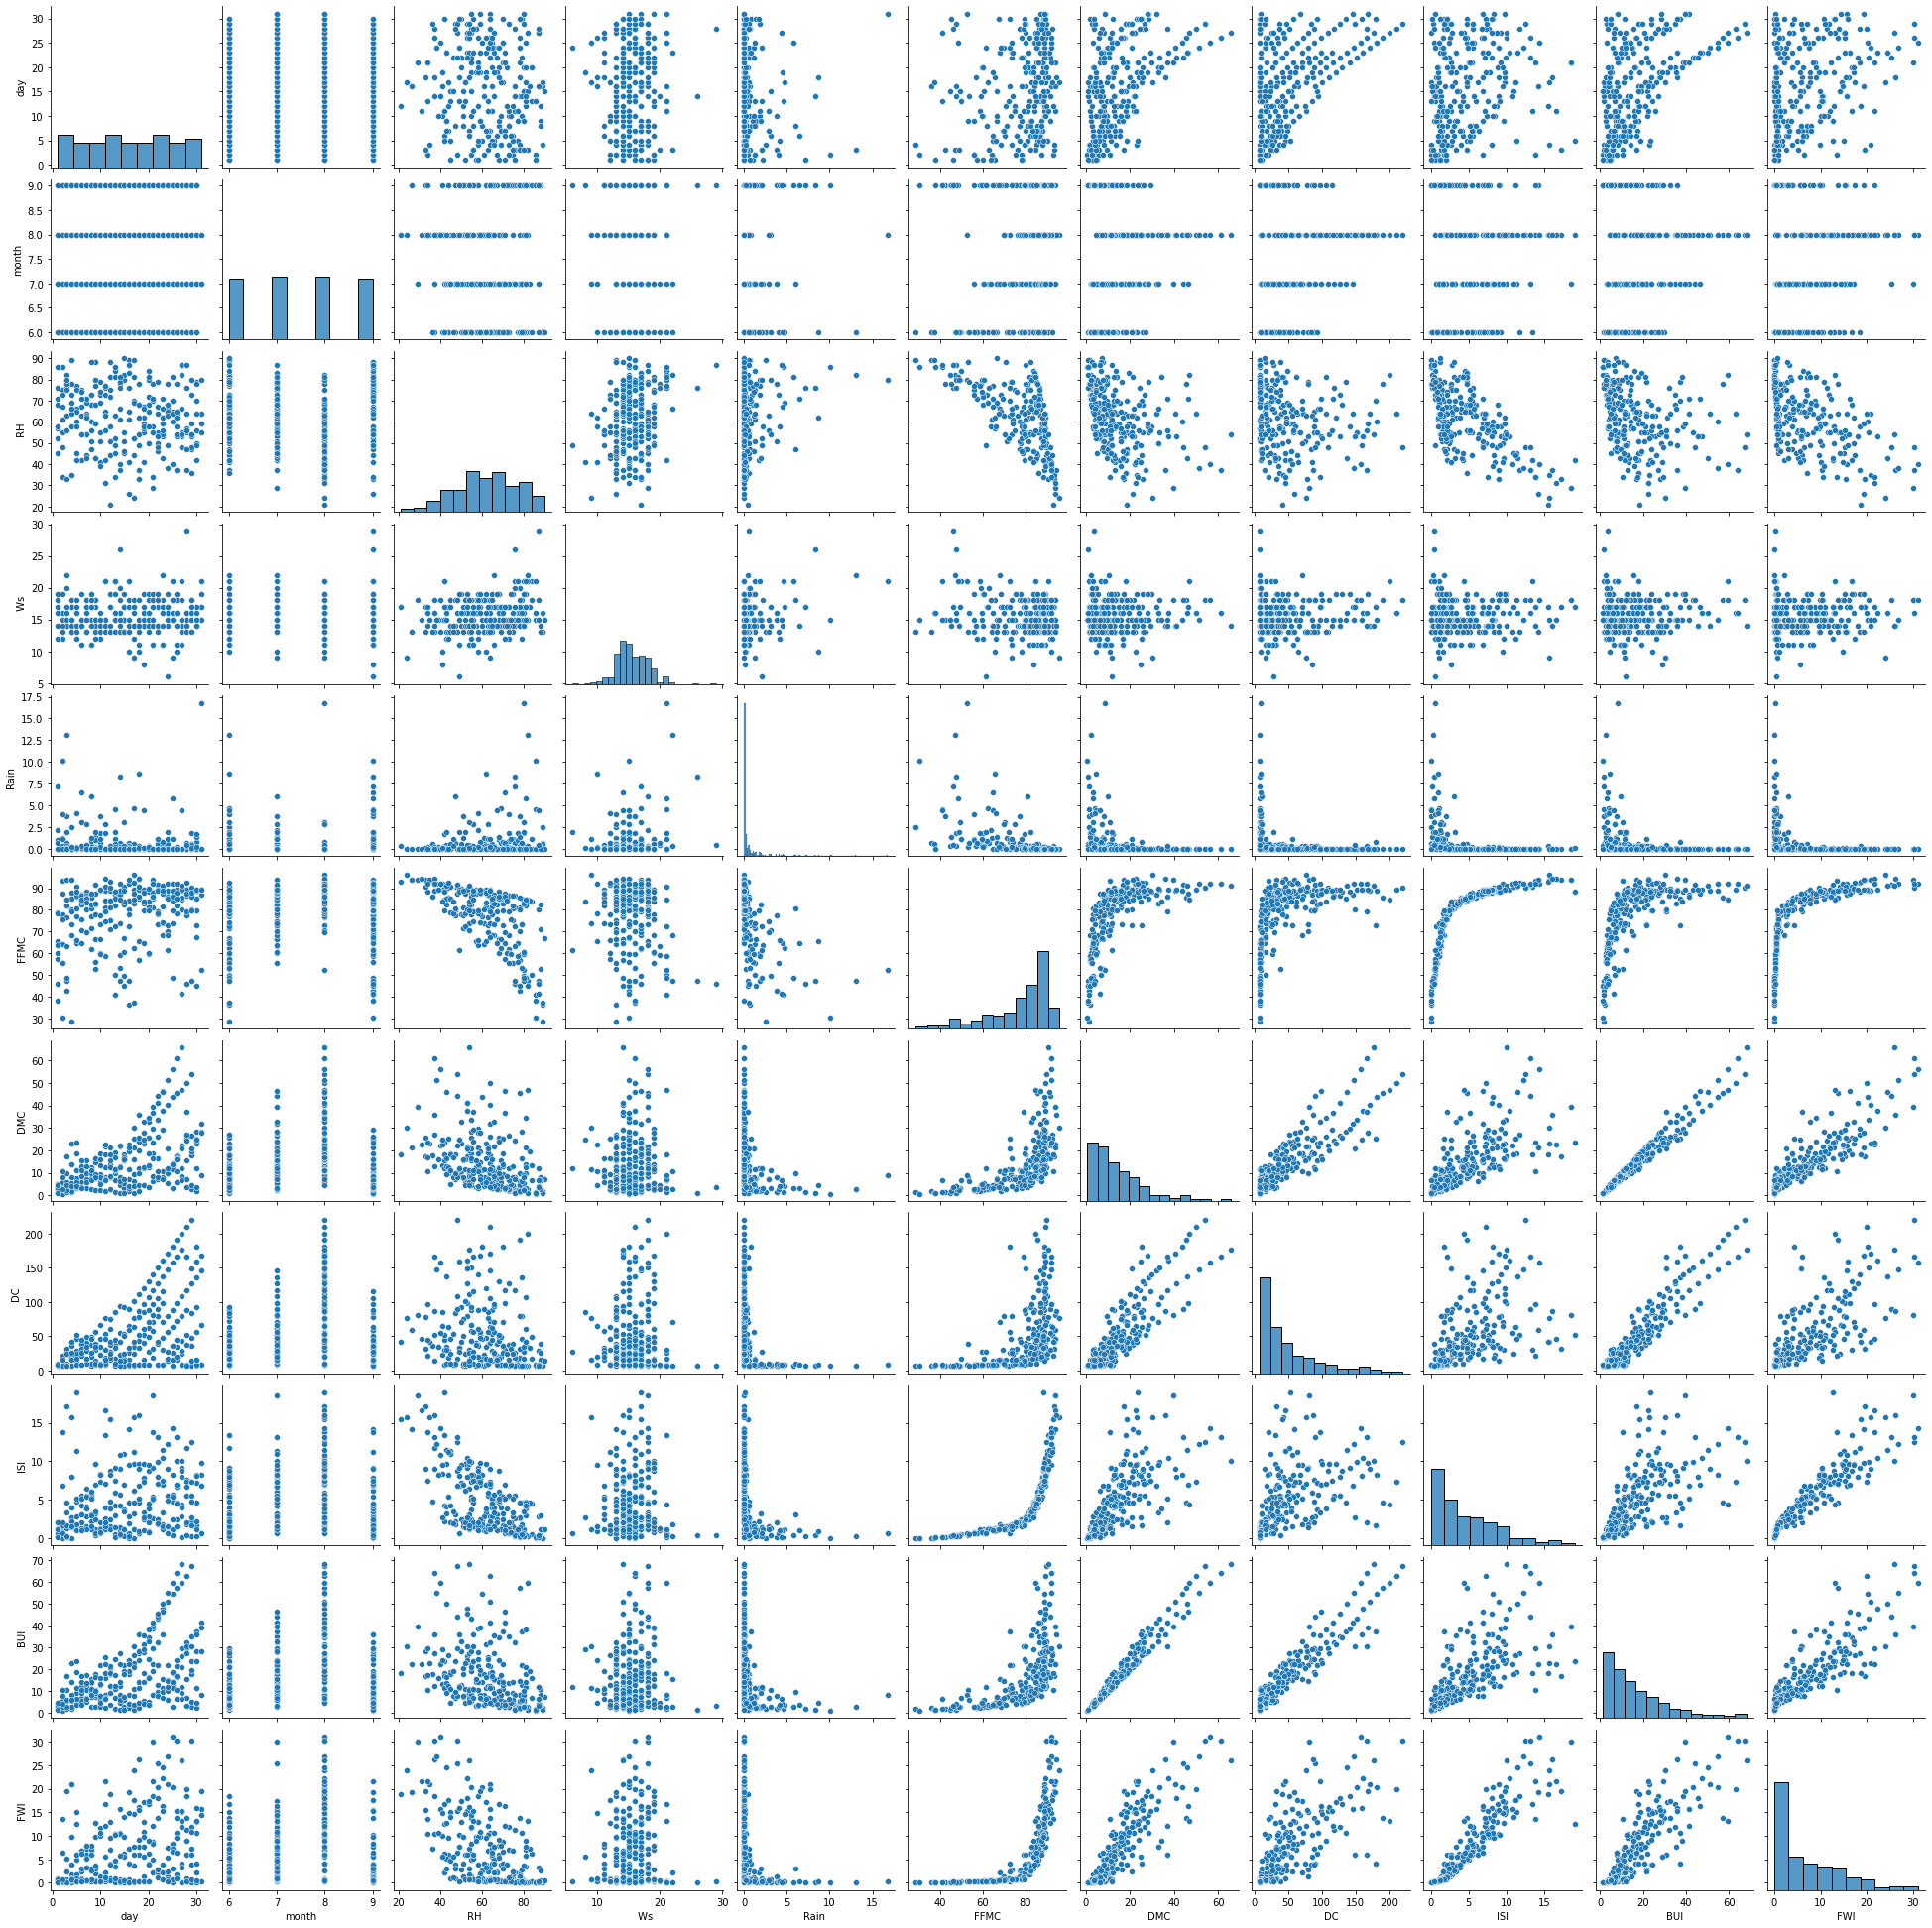

In [12]:
import seaborn as sns
sns.pairplot(df_final)

<AxesSubplot:>

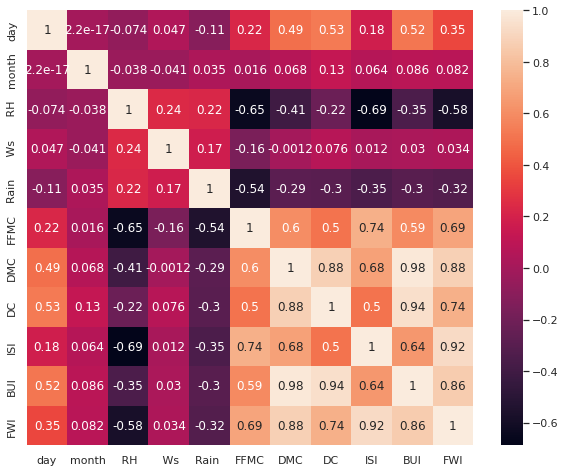

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(df_final.corr(),annot=True)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.33, random_state=10)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler

StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.97156746,
        -0.32636097, -0.86597829],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  1.19293541,
         0.76499972,  1.21371864],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.47936304,
         0.35224151,  0.48516239],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.52693453,
         0.08639724,  0.37919057],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.59099552,
        -0.76710278, -0.78649943],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.80506723,
        -0.27738965, -0.7997459 ]])

In [13]:
X_test=scaler.transform(X_test)
X_test

array([[-4.92481607e-01, -4.48858777e-01, -3.92594448e-01,
        -9.14668296e-02,  1.48701853e+00, -1.82411230e-01,
        -6.02677495e-01, -8.21325921e-01, -7.33709998e-01,
        -6.83151962e-01, -8.12992382e-01],
       [ 1.90020102e+00, -4.48858777e-01,  1.37367416e-01,
         6.35806011e-01, -4.41414004e-01,  6.64566895e-01,
         1.37979749e+00,  2.03374779e+00,  5.03148781e-01,
         1.72343828e+00,  1.16073273e+00],
       [-1.68882292e+00,  4.43384889e-01, -1.12129201e+00,
        -4.55103250e-01, -4.41414004e-01,  9.08075201e-02,
        -7.86536062e-01, -8.06652268e-01, -6.38567015e-01,
        -8.30065901e-01, -7.99745905e-01],
       [-1.44955466e+00,  4.43384889e-01,  7.11221826e-02,
        -4.55103250e-01, -2.41920984e-01, -5.94627923e-02,
        -7.14591405e-01, -8.10844740e-01, -7.09924252e-01,
        -7.74098686e-01, -8.12992382e-01],
       [-7.31749870e-01,  4.43384889e-01, -1.93858749e-01,
         6.35806011e-01, -4.41414004e-01,  6.78227832e-01,
  

In [14]:
import joblib
filename = 'scaler.sav'
joblib.dump(scaler, filename)

['scaler.sav']

In [15]:


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)




LogisticRegression()

In [16]:
pred=model.predict(X_test)
pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [17]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test,pred)
conf_mat


array([[30,  0],
       [ 8, 43]])

In [18]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [19]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive+true_negative+false_negative)
Accuracy


0.9012345679012346

In [20]:

Precision = true_positive/(true_positive+false_positive)
Precision

1.0

In [21]:
Recall = true_positive/(true_positive+false_negative)
Recall


0.7894736842105263

In [22]:
X_test[0].reshape(1,-1).shape

(1, 11)

Predicting Single Record

In [24]:
model.predict((X_test[79].reshape(1,-1)))

array([1])

In [23]:
import joblib
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']